# Time Series Decomposition Assignment

Import packages that will be used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Read the data.

In [2]:
df_ts = pd.read_csv('ConstructionTimeSeriesDataV2.csv') #Importing the ConstructionTimeSeriesDataV2.csv file

In [3]:
df_ts.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,2-Jan,59516,45273,14243
1,2,2-Feb,58588,44475,14113
2,3,2-Mar,63782,49396,14386
3,4,2-Apr,69504,53283,16221
4,5,2-May,73384,55009,18375


Graph data for visialization and analysis purposes.

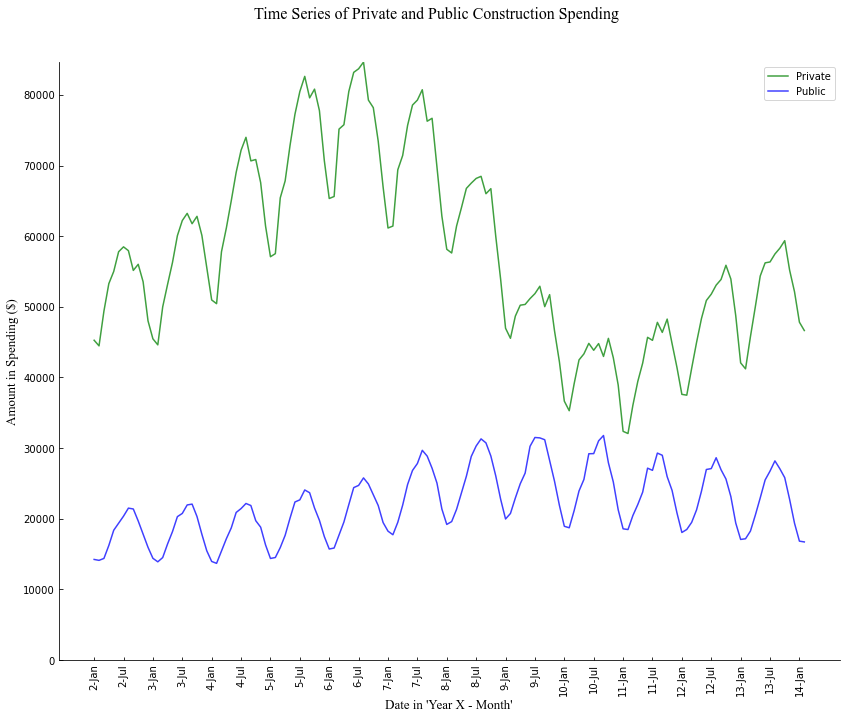

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df_ts = pd.read_csv('ConstructionTimeSeriesDataV2.csv') #Importing the ConstructionTimeSeriesDataV2.csv file


""" Setting the x and y axis"""
x = df_ts['Month-Year']
y = df_ts['Private Construction']
z = df_ts['Public Construction']


"""Plot time series data"""
fig, ax = plt.subplots()
ax.plot(x,y, color='g', label = 'Private', alpha=0.75)
ax.plot(x,z, color='b', label = 'Public', alpha=0.75)

fig.suptitle('Time Series of Private and Public Construction Spending', y = 0.95, size = 16, fontname = 'Times New Roman')
fig.set_size_inches(14,11)

ax.grid(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.xaxis.set_label_text("Date in 'Year X - Month'", size = 13, fontname = 'Times New Roman')
ax.yaxis.set_label_text('Amount in Spending ($)', size = 13, fontname = 'Times New Roman')
ax.set_xticks(x[::6])
ax.set_xticklabels(x[::6])
ax.set_ylim(0,max(y))
ax.xaxis.set_tick_params(which = 'both', top = False, bottom = True, labelbottom = True, direction='in')
ax.yaxis.set_tick_params(which = 'both', right = False, left = True, labelleft = True, direction='in')
ax.legend()

plt.xticks(rotation=90)
plt.show()

# Private Construction Spending

In [5]:
del df_ts['Public Construction']
del df_ts['Total Construction']

Decomposition of this data by forcasted demand into the future allows components to be easier to detech and express individually. Each component can be identified and extrpolated. 

Squared Error and Moving Average will be computed.

Average Squared Error per Month:  37395667.05489795
            Month Month-Year  Private Construction        MovAvg         sqErr
2003-07-31     19      3-Jul                 62216  57969.430556  1.803335e+07
2003-08-31     20      3-Aug                 63234  58314.944444  2.419711e+07
2003-09-30     21      3-Sep                 61767  58718.902778  9.290897e+06
2003-10-31     22      3-Oct                 62813  59143.555556  1.346482e+07
2003-11-30     23      3-Nov                 60115  59593.541667  2.719188e+05
...           ...        ...                   ...           ...           ...
2012-04-30    124     12-Apr                 44964  46543.069444  2.493460e+06
2012-05-31    125     12-May                 48342  46907.194444  2.058667e+06
2012-06-30    126     12-Jun                 50900  47262.611111  1.323060e+07
2012-07-31    127     12-Jul                 51794  47660.583333  1.708513e+07
2012-08-31    128     12-Aug                 53073  48077.638889  2.495363e+07


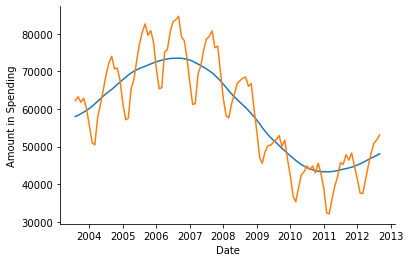

In [6]:
def sqErr(row):
    return (row['Private Construction'] - row['MovAvg'])**2
    
df_ts['MovAvg'] = np.NaN
df_ts['sqErr'] = np.NaN

df_ts.index = pd.date_range(freq = 'm', start = pd.Timestamp(year = 2002, month = 1, day = 31), periods = len(df_ts['Private Construction']))

 
window = 36
window = window - window % 2
 
"""Calculates Moving Average"""
for i in range(int(window/2), df_ts.shape[0]-int(window/2)):
    df_ts.loc[df_ts.index[i],'MovAvg'] = (0.5*df_ts.iloc[i - int(window/2)]['Private Construction'] + df_ts.iloc[i - int(window/2)+1:i + int(window/2)]['Private Construction'].sum() + 0.5*df_ts.iloc[i + int(window/2)]['Private Construction'])/float(window)

"""Calculates Squared Error"""
df_ts['sqErr'] = (df_ts['Private Construction'] - df_ts['MovAvg'])**2

df_ts.dropna(how='any',inplace=True)


fig,ax = plt.subplots()
ax.plot(df_ts['MovAvg'],label = 'Moving Avg.')
ax.plot(df_ts['Private Construction'],label ='Private Construction')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ', sum(df_ts['sqErr'])/len(df_ts))
print(df_ts)


For Private Construction Spending: $R1$ = Moving average - demand time series

In [7]:
df_ts['R1'] = df_ts['Private Construction'] - df_ts['MovAvg']
df_ts['R1'] = abs((df_ts['Private Construction'] - df_ts['R1'])/df_ts['Private Construction'])
df_ts.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Private Construction,MovAvg,sqErr,R1
2003-07-31 00:00:00,19,3-Jul,62216,57969.4,"18,033,352.0",0.9
2003-08-31 00:00:00,20,3-Aug,63234,58314.9,"24,197,107.6",0.9
2003-09-30 00:00:00,21,3-Sep,61767,58718.9,"9,290,896.7",1.0
2003-10-31 00:00:00,22,3-Oct,62813,59143.6,"13,464,822.5",0.9
2003-11-30 00:00:00,23,3-Nov,60115,59593.5,"271,918.8",1.0
2003-12-31 00:00:00,24,3-Dec,55584,60111.7,"20,500,394.3",1.1
2004-01-31 00:00:00,25,4-Jan,50975,60687.3,"94,329,418.8",1.2
2004-02-29 00:00:00,26,4-Feb,50449,61335.4,"118,514,067.8",1.2
2004-03-31 00:00:00,27,4-Mar,57796,62017.4,"17,820,241.4",1.1
2004-04-30 00:00:00,28,4-Apr,61177,62701.1,"2,322,787.7",1.0


The following graph will help visualize the remaining pattern that needs to be decomposed for private consturction spending, $R1$. This also computes the average residual demand pattern.

Average Residual:  1.0157730374883145


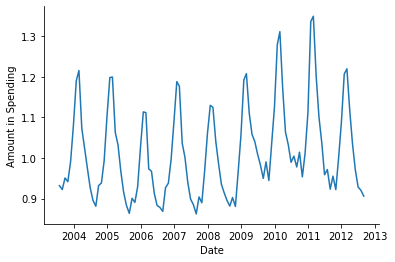

In [8]:
fig,ax = plt.subplots()
ax.plot(df_ts['R1'])
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_ts['R1'])/len(df_ts))

Using autocorrelation analysis will detect whether any cyclical patterns exist and how man periods before they repeat.

In [9]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_ts['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8083754302434579
Correlation, lag  2     0.4331824205969595
Correlation, lag  3     0.028013280386026147
Correlation, lag  4     -0.27944536731574904
Correlation, lag  5     -0.47007814884577426
Correlation, lag  6     -0.5430524545034486
Correlation, lag  7     -0.46191783769648537
Correlation, lag  8     -0.2721608995939885
Correlation, lag  9     0.012130338893019944
Correlation, lag  10     0.3839779743871993
Correlation, lag  11     0.7261304571454537
Correlation, lag  12     0.899130485438726
Correlation, lag  13     0.7164124529918521
Correlation, lag  14     0.3582093220448679
Correlation, lag  15     -0.03748057449676972
Correlation, lag  16     -0.33678396311331976
Correlation, lag  17     -0.5189002251726664
Correlation, lag  18     -0.5915897579300204
Correlation, lag  19     -0.5213714831418526
Correlation, lag  20     -0.34334276308466016
Correlation, lag  21     -0.062000609765348574
Correlation, lag  22     0.30335428587076146
Correlation, lag 

The code cell below:
- Breaks the time series into three components corresonding with each of the three cycles in the data.  Note that the third cycle is partial.
- Computes an average for each of the 36 points within the cycle over all intances of each point in the data
- Plots the average versus the 3 cycle instances within the data

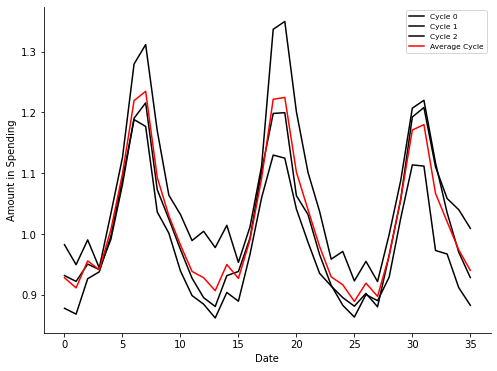

In [10]:
period = 36
cycleLen = period
numCycles = int(len(df_ts)/cycleLen + 0.5)
cycles = [df_ts.iloc[range(i*period,min((i+1)*period,len(df_ts)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_ts.iloc[range(i,len(df_ts['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
fig.set_size_inches(8, 6)
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 'best', fontsize = 7.5)



This code cell:
- Plots the cyclicality component with the $R1$ column to see how well the cyclicality component and it match.

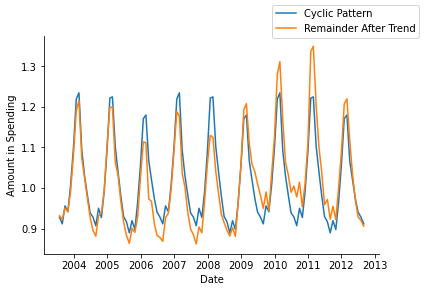

In [11]:
cycleLen = period   
numCycles = int(len(df_ts)/cycleLen + 0.5)
df_ts['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_ts)):
    df_ts.loc[df_ts.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df_ts['C'],label='Cyclic Pattern')
ax.plot(df_ts['R1'],label='Remainder After Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

The following code will express the remaining of the data without the cyclical component.

Average Error:  6.890669201497604e-07
            Month Month-Year  Private Construction        MovAvg        R1  \
2003-07-31     19      3-Jul                 62216  57969.430556  0.931745   
2003-08-31     20      3-Aug                 63234  58314.944444  0.922209   
2003-09-30     21      3-Sep                 61767  58718.902778  0.950652   
2003-10-31     22      3-Oct                 62813  59143.555556  0.941581   
2003-11-30     23      3-Nov                 60115  59593.541667  0.991326   
...           ...        ...                   ...           ...       ...   
2012-04-30    124     12-Apr                 44964  46543.069444  1.035119   
2012-05-31    125     12-May                 48342  46907.194444  0.970320   
2012-06-30    126     12-Jun                 50900  47262.611111  0.928539   
2012-07-31    127     12-Jul                 51794  47660.583333  0.920195   
2012-08-31    128     12-Aug                 53073  48077.638889  0.905878   

                   C  R2P

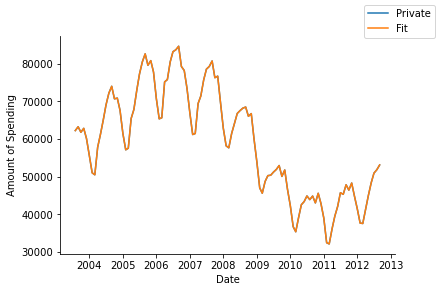

In [12]:
df_ts['R2Private'] = df_ts['R1'] - df_ts['C']
df_ts['R2ErrorPrivate'] = abs(df_ts['R2Private']/df_ts['Private Construction'])
df_ts['fit'] = df_ts['Private Construction'] + df_ts['C']
df_ts.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df_ts['R2ErrorPrivate'])/len(df_ts))
print(df_ts)


fig,ax = plt.subplots()
ax.plot(df_ts['Private Construction'], label = 'Private')
ax.plot(df_ts['fit'], label = 'Fit')
ax.set_xlabel('Date')
ax.set_ylabel('Amount of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.legend()

Here is a plot of the residual $R2Private$ for visualization purposes to observe any remaining patterns that we might want to capture, and also an autocorrelation analysis of the residual.

Correlation, lag  1     0.8955190815746292
Correlation, lag  2     0.794571139213316
Correlation, lag  3     0.691620757675498
Correlation, lag  4     0.6783776922016845
Correlation, lag  5     0.6645404813124403
Correlation, lag  6     0.6996401040152619
Correlation, lag  7     0.6537791546694213
Correlation, lag  8     0.6294498857322639
Correlation, lag  9     0.5653372243648018
Correlation, lag  10     0.5803507638816499
Correlation, lag  11     0.5868263494319281
Correlation, lag  12     0.5986380975325933
Correlation, lag  13     0.5163686710872305
Correlation, lag  14     0.45165536378897464
Correlation, lag  15     0.3399065403761879
Correlation, lag  16     0.3086062292687106
Correlation, lag  17     0.3048775644400983
Correlation, lag  18     0.3567663757933105
Correlation, lag  19     0.3772696853190938
Correlation, lag  20     0.393434881353683
Correlation, lag  21     0.3300630074920814
Correlation, lag  22     0.30114994013964286
Correlation, lag  23     0.264610059666308

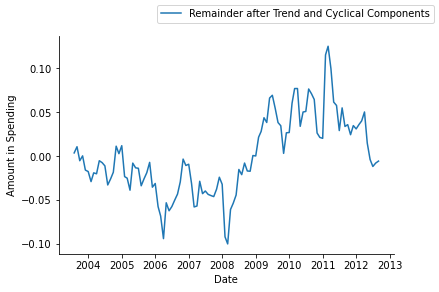

In [13]:
fig,ax = plt.subplots()
ax.plot(df_ts['R2Private'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_ts['R2Private'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

A final grpah to show the model vs the original data and the remainder of $R2Private$.

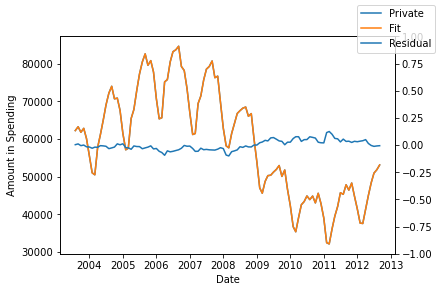

In [14]:
fig,ax = plt.subplots()
ax.plot(df_ts['Private Construction'],label='Private')
ax.plot(df_ts['fit'],label='Fit')

ax1 = ax.twinx()
ax1.set_ylim(-1,1) 
ax1.plot(df_ts['R2Private'],label='Residual')

ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
fig.legend()

# Public Construction Spending

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
df_ts = pd.read_csv('ConstructionTimeSeriesDataV2.csv') #Importing the ConstructionTimeSeriesDataV2.csv filedel df_ts['Private Construction'] 


In [17]:
df_ts.head()

,Month,Month-Year,Total Construction,Private Construction,Public Construction
0,1,2-Jan,59516,45273,14243
1,2,2-Feb,58588,44475,14113
2,3,2-Mar,63782,49396,14386
3,4,2-Apr,69504,53283,16221
4,5,2-May,73384,55009,18375


In [18]:
del df_ts['Private Construction'] 
del df_ts['Total Construction']

Decomposition of this data by forcasted demand into the future allows components to be easier to detech and express individually. Each component can be identified and extrpolated. 

Squared Error and Moving Average will be computed.

Average Squared Error per Month:  13581548.10100133
            Month Month-Year  Public Construction        MovAvg         sqErr
2003-07-31     19      3-Jul                20755  18050.486111  7.314395e+06
2003-08-31     20      3-Aug                21957  18058.000000  1.520220e+07
2003-09-30     21      3-Sep                22075  18084.916667  1.592077e+07
2003-10-31     22      3-Oct                20321  18126.152778  4.817354e+06
2003-11-30     23      3-Nov                17801  18170.000000  1.361610e+05
...           ...        ...                  ...           ...           ...
2012-04-30    124     12-Apr                21259  23397.138889  4.571638e+06
2012-05-31    125     12-May                23898  23333.500000  3.186602e+05
2012-06-30    126     12-Jun                26975  23272.680556  1.370717e+07
2012-07-31    127     12-Jul                27104  23222.000000  1.506992e+07
2012-08-31    128     12-Aug                28640  23173.416667  2.988353e+07

[110 rows x

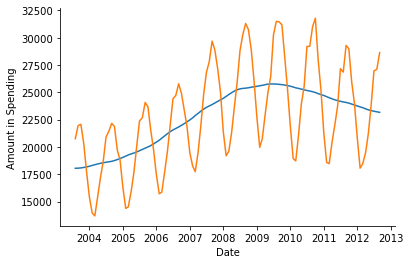

In [19]:
def sqErr(row):
    return (row['Public Construction'] - row['MovAvg'])**2
    
df_ts['MovAvg'] = np.NaN
df_ts['sqErr'] = np.NaN

df_ts.index = pd.date_range(freq = 'm', start = pd.Timestamp(year = 2002, month = 1, day = 31), periods = len(df_ts['Public Construction']))

 
window = 36
window = window - window % 2
 
"""Calculates Moving Average"""
for i in range(int(window/2), df_ts.shape[0]-int(window/2)):
    df_ts.loc[df_ts.index[i],'MovAvg'] = (0.5*df_ts.iloc[i - int(window/2)]['Public Construction'] + df_ts.iloc[i - int(window/2)+1:i + int(window/2)]['Public Construction'].sum() + 0.5*df_ts.iloc[i + int(window/2)]['Public Construction'])/float(window)

"""Calculates Squared Error"""
df_ts['sqErr'] = (df_ts['Public Construction'] - df_ts['MovAvg'])**2

df_ts.dropna(how='any',inplace=True)


fig,ax = plt.subplots()
ax.plot(df_ts['MovAvg'],label = 'Moving Avg.')
ax.plot(df_ts['Public Construction'],label ='Public Construction')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Squared Error per Month: ', sum(df_ts['sqErr'])/len(df_ts))
print(df_ts)


For Public Construction Spending: $R1$ = Moving average - demand time series

In [20]:
df_ts['R1'] = df_ts['Public Construction'] - df_ts['MovAvg']
df_ts['R1'] = abs((df_ts['Public Construction'] - df_ts['R1'])/df_ts['Public Construction'])
df_ts.style.format({
    'MovAvg': '{:.1f}'.format,
    'sqErr': '{:,.1f}'.format,
    'R1': '{:,.1f}'.format,
    'R1Error': '{:,.3f}'.format
})

,Month,Month-Year,Public Construction,MovAvg,sqErr,R1
2003-07-31 00:00:00,19,3-Jul,20755,18050.5,"7,314,395.4",0.9
2003-08-31 00:00:00,20,3-Aug,21957,18058.0,"15,202,201.0",0.8
2003-09-30 00:00:00,21,3-Sep,22075,18084.9,"15,920,765.0",0.8
2003-10-31 00:00:00,22,3-Oct,20321,18126.2,"4,817,354.3",0.9
2003-11-30 00:00:00,23,3-Nov,17801,18170.0,"136,161.0",1.0
2003-12-31 00:00:00,24,3-Dec,15466,18235.5,"7,670,130.2",1.2
2004-01-31 00:00:00,25,4-Jan,13959,18309.2,"18,923,950.0",1.3
2004-02-29 00:00:00,26,4-Feb,13689,18377.0,"21,976,953.3",1.3
2004-03-31 00:00:00,27,4-Mar,15443,18444.6,"9,009,669.3",1.2
2004-04-30 00:00:00,28,4-Apr,17177,18502.0,"1,755,625.0",1.1


The following graph will help visualize the remaining pattern that needs to be decomposed for Public consturction spending, $R1$. This also computes the average residual demand pattern.

Average Residual:  1.022554398781689


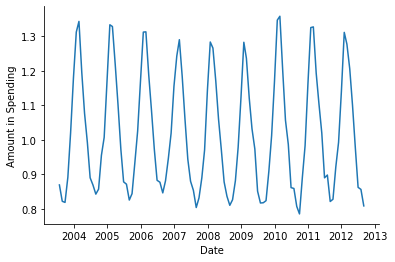

In [21]:
fig,ax = plt.subplots()
ax.plot(df_ts['R1'])
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
print('Average Residual: ', sum(df_ts['R1'])/len(df_ts))

Using autocorrelation analysis will detect whether any cyclical patterns exist and how man periods before they repeat.

In [22]:
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_ts['R1'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

Correlation, lag  1     0.8398332392232293
Correlation, lag  2     0.45279858299955467
Correlation, lag  3     -0.03738598893538681
Correlation, lag  4     -0.49885535154511884
Correlation, lag  5     -0.7995327027999997
Correlation, lag  6     -0.8940692709317642
Correlation, lag  7     -0.7880643671711899
Correlation, lag  8     -0.474155414872272
Correlation, lag  9     -0.01518654832444498
Correlation, lag  10     0.4563747564140932
Correlation, lag  11     0.8322237642051105
Correlation, lag  12     0.9838421063640285
Correlation, lag  13     0.8311365684888982
Correlation, lag  14     0.45249776572745287
Correlation, lag  15     -0.035908644495755655
Correlation, lag  16     -0.4896650968032621
Correlation, lag  17     -0.792348704967073
Correlation, lag  18     -0.8935400451427792
Correlation, lag  19     -0.7944258547323871
Correlation, lag  20     -0.4843803230113522
Correlation, lag  21     -0.026246624537159383
Correlation, lag  22     0.4480595345628759
Correlation, lag  23

The code cell below:
- Breaks the time series into three components corresonding with each of the three cycles in the data.  Note that the third cycle is partial.
- Computes an average for each of the 36 points within the cycle over all intances of each point in the data
- Plots the average versus the 3 cycle instances within the data

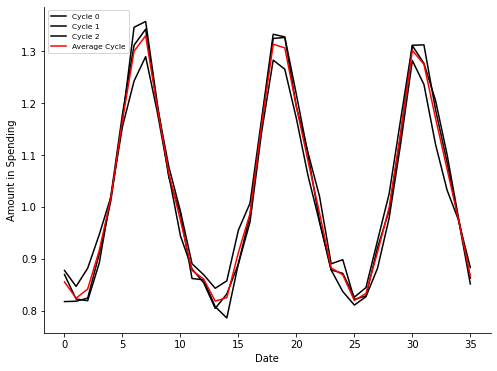

In [23]:
period = 36
cycleLen = period
numCycles = int(len(df_ts)/cycleLen + 0.5)
cycles = [df_ts.iloc[range(i*period,min((i+1)*period,len(df_ts)))]['R1'] for i in range(numCycles)]
ptsInCycles = [df_ts.iloc[range(i,len(df_ts['R1']),period)]['R1'].tolist() for i in range(period)]
avg = [sum(pts)/len(pts) for pts in ptsInCycles]

fig,ax = plt.subplots()
fig.set_size_inches(8, 6)
for i in range(len(cycles)):
    ax.plot(cycles[i].values,label='Cycle '+str(i),c='k')
ax.plot(avg,label='Average Cycle',c='r')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc = 'best', fontsize = 7.5)



This code cell:
- Plots the cyclicality component with the $R1$ column to see how well the cyclicality component and it match.

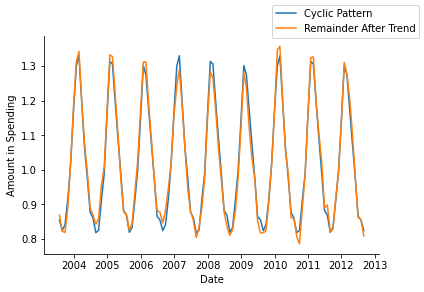

In [24]:
cycleLen = period   
numCycles = int(len(df_ts)/cycleLen + 0.5)
df_ts['C'] = np.NaN   # Creates an empty column for the cyclicality component data
for i in range(len(df_ts)):
    df_ts.loc[df_ts.index[i], 'C'] = avg[i % cycleLen] # Write appropriate cyclicality value

fig,ax = plt.subplots()
ax.plot(df_ts['C'],label='Cyclic Pattern')
ax.plot(df_ts['R1'],label='Remainder After Trend')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()

The following code will express the remaining of the data without the cyclical component.

Average Error:  7.859304377382087e-07
            Month Month-Year  Public Construction        MovAvg        R1  \
2003-07-31     19      3-Jul                20755  18050.486111  0.869693   
2003-08-31     20      3-Aug                21957  18058.000000  0.822426   
2003-09-30     21      3-Sep                22075  18084.916667  0.819249   
2003-10-31     22      3-Oct                20321  18126.152778  0.891991   
2003-11-30     23      3-Nov                17801  18170.000000  1.020729   
...           ...        ...                  ...           ...       ...   
2012-04-30    124     12-Apr                21259  23397.138889  1.100576   
2012-05-31    125     12-May                23898  23333.500000  0.976379   
2012-06-30    126     12-Jun                26975  23272.680556  0.862750   
2012-07-31    127     12-Jul                27104  23222.000000  0.856774   
2012-08-31    128     12-Aug                28640  23173.416667  0.809128   

                   C  R2Public  R2Err

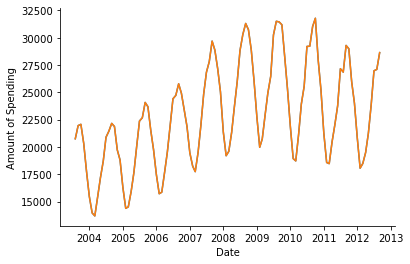

In [25]:
df_ts['R2Public'] = df_ts['R1'] - df_ts['C']
df_ts['R2ErrorPublic'] = abs(df_ts['R2Public']/df_ts['Public Construction'])
df_ts['fit'] = df_ts['Public Construction'] + df_ts['C']
df_ts.drop(['sqErr'],axis=1,inplace=True)
print('Average Error: ', sum(df_ts['R2ErrorPublic'])/len(df_ts))
print(df_ts)


fig,ax = plt.subplots()
ax.plot(df_ts['Public Construction'], label = 'Public')
ax.plot(df_ts['fit'], label = 'Fit')
ax.set_xlabel('Date')
ax.set_ylabel('Amount of Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


Here is a plot of the residual $R2Public$ for visualization purposes to observe any remaining patterns that we might want to capture, and also an autocorrelation analysis of the residual.

Correlation, lag  1     0.6634632761345673
Correlation, lag  2     0.4727988479776514
Correlation, lag  3     0.40998812777324684
Correlation, lag  4     0.2769713274646175
Correlation, lag  5     0.26895544990117265
Correlation, lag  6     0.24722410824418106
Correlation, lag  7     0.1468540707441356
Correlation, lag  8     0.2123585454864636
Correlation, lag  9     0.27546457251005263
Correlation, lag  10     0.16111760494286365
Correlation, lag  11     0.23634848071705591
Correlation, lag  12     0.2957947107313888
Correlation, lag  13     0.19381325700325064
Correlation, lag  14     0.2616932410127747
Correlation, lag  15     0.1526846435299269
Correlation, lag  16     0.11089519572552459
Correlation, lag  17     0.14695001039821087
Correlation, lag  18     0.1254389203197254
Correlation, lag  19     0.08358816319748154
Correlation, lag  20     0.1463697725705955
Correlation, lag  21     0.08383022603940431
Correlation, lag  22     -0.04995569414995413
Correlation, lag  23     -0.

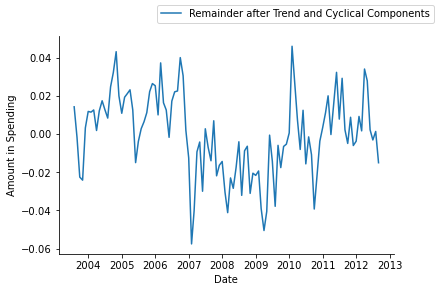

In [26]:
fig,ax = plt.subplots()
ax.plot(df_ts['R2Public'],label='Remainder after Trend and Cyclical Components')
ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.legend()
maxCorr = 0.0
period = np.NaN
for i in range(1,37):
    corr = df_ts['R2Public'].autocorr(lag=i)
    print('Correlation, lag ',i,'   ',corr)
    if corr > maxCorr:
        maxCorr = corr
        period = i
print('period = ',period,'     Maximum Correlation = ',maxCorr)

A final grpah to show the model vs the original data and the remainder of $R2Public$.

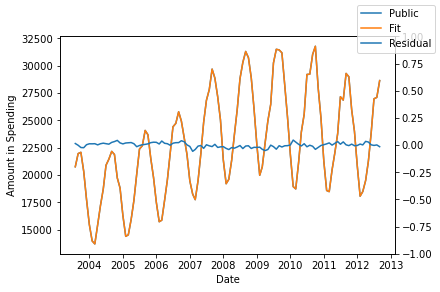

In [27]:
fig,ax = plt.subplots()
ax.plot(df_ts['Public Construction'],label='Public')
ax.plot(df_ts['fit'],label='Fit')

ax1 = ax.twinx()
ax1.set_ylim(-1,1) 
ax1.plot(df_ts['R2Public'],label='Residual')

ax.set_xlabel('Date')
ax.set_ylabel('Amount in Spending')
fig.legend()